In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [11]:
data = pd.read_csv('../datasets/police_shootings_cleaned.csv')

data.head()



,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,age_group
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR",46-55
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA",46-55
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS",19-25
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK",19-25
4,2015-01-04,Matthew Hoffman,32.0,male,replica,White,San Francisco,CA,not,False,True,"San Francisco Police Department, CA",26-35


In [12]:
# set date as indices
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
print(data.head())

                          name   age gender    armed      race           city  \
date                                                                            
2015-01-02    Lewis Lee Lembke  47.0   male      gun     White          Aloha   
2015-01-02          Tim Elliot  53.0   male      gun     Asian        Shelton   
2015-01-03  John Paul Quintero  23.0   male  unarmed  Hispanic        Wichita   
2015-01-04   Kenneth Joe Brown  18.0   male      gun     White        Guthrie   
2015-01-04     Matthew Hoffman  32.0   male  replica     White  San Francisco   

           state flee  body_camera  signs_of_mental_illness  \
date                                                          
2015-01-02    OR  not        False                    False   
2015-01-02    WA  not        False                     True   
2015-01-03    KS  not        False                    False   
2015-01-04    OK  not        False                    False   
2015-01-04    CA  not        False                    

In [13]:
#Analyzing each of the top 3 states with the highest number of police shootings by month

# California
data_cal = data[data['state'] == 'CA']
data_cal['count'] = 1
data_cal = data_cal.resample('M').sum()
data_cal = data_cal[['count']]
data_cal = data_cal.reset_index()
data_cal.columns = ['ds', 'y']

# Texas
data_tx = data[data['state'] == 'TX']
data_tx['count'] = 1
data_tx = data_tx.resample('M').sum()
data_tx = data_tx[['count']]
data_tx = data_tx.reset_index()
data_tx.columns = ['ds', 'y']

# Florida
data_fl = data[data['state'] == 'FL']
data_fl['count'] = 1
data_fl = data_fl.resample('M').sum()
data_fl = data_fl[['count']]
data_fl = data_fl.reset_index()
data_fl.columns = ['ds', 'y']


C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_22424\637980046.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cal['count'] = 1
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_22424\637980046.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_cal = data_cal.resample('M').sum()
C:\Users\Dhruv Kothari\AppData\Local\Temp\ipykernel_22424\637980046.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tx['count'] = 1
C:\Users\Dhru

In [14]:
from prophet import Prophet
# Fit the model for California
data_cal_cur = data_cal[data_cal['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_cal_cur)

# Make predictions
future = model.make_future_dataframe(periods=24, freq='M')
forecast_cal = model.predict(future)

# Fit the model for Texas
data_tx_cur = data_tx[data_tx['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_tx_cur)

# Make predictions
future = model.make_future_dataframe(periods=24, freq='M')
forecast_tx = model.predict(future)

# Fit the model for Florida
data_fl_cur = data_fl[data_fl['ds'] < '2022-01-01']
model = Prophet()
model.fit(data_fl_cur)

# Make predictions
future = model.make_future_dataframe(periods=24, freq='M')
forecast_fl = model.predict(future)


17:21:48 - cmdstanpy - INFO - Chain [1] start processing
17:21:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:21:50 - cmdstanpy - INFO - Chain [1] start processing
17:21:51 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
17:21:51 - cmdstanpy - INFO - Chain [1] start processing
17:21:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Dhruv Kothari\OneDrive - iiit-b\Desktop\sem5\DV\A-3\venv\lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, ple

In [15]:
data_cal_fut = data_cal[data_cal['ds'] >= '2022-01-01']
data_cal_fut = data_cal_fut[data_cal_fut['ds'] < '2024-01-01']

data_tx_fut = data_tx[data_tx['ds'] >= '2022-01-01']
data_tx_fut = data_tx_fut[data_tx_fut['ds'] < '2024-01-01']

data_fl_fut = data_fl[data_fl['ds'] >= '2022-01-01']
data_fl_fut = data_fl_fut[data_fl_fut['ds'] < '2024-01-01']

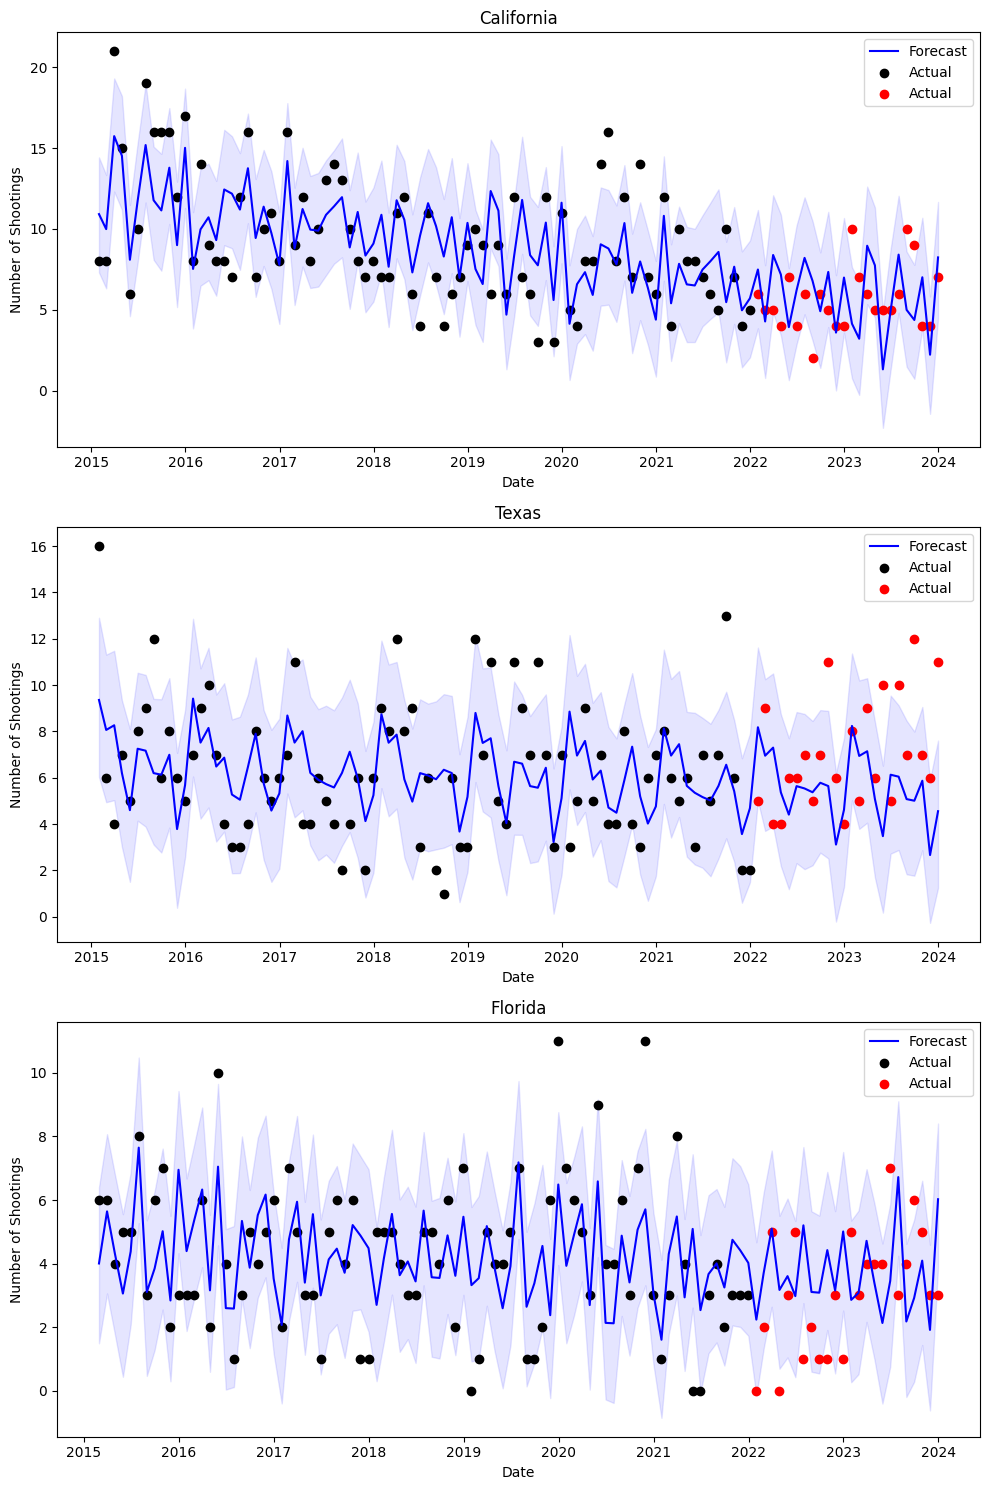

<Figure size 640x480 with 0 Axes>

In [16]:
# Plot the forecast for California
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plot the forecast for California
ax[0].plot(forecast_cal['ds'], forecast_cal['yhat'], label='Forecast', color='blue')
ax[0].fill_between(forecast_cal['ds'], forecast_cal['yhat_lower'], forecast_cal['yhat_upper'], color='blue', alpha=0.1)
ax[0].scatter(data_cal_cur['ds'], data_cal_cur['y'], label='Actual', color='black')
ax[0].scatter(data_cal_fut['ds'], data_cal_fut['y'], label='Actual', color='red')
ax[0].set_title('California')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Number of Shootings')
ax[0].legend()

# Plot the forecast for Texas
ax[1].plot(forecast_tx['ds'], forecast_tx['yhat'], label='Forecast', color='blue')
ax[1].fill_between(forecast_tx['ds'], forecast_tx['yhat_lower'], forecast_tx['yhat_upper'], color='blue', alpha=0.1)
ax[1].scatter(data_tx_cur['ds'], data_tx_cur['y'], label='Actual', color='black')
ax[1].scatter(data_tx_fut['ds'], data_tx_fut['y'], label='Actual', color='red')
ax[1].set_title('Texas')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Number of Shootings')
ax[1].legend()

# Plot the forecast for Florida
ax[2].plot(forecast_fl['ds'], forecast_fl['yhat'], label='Forecast', color='blue')
ax[2].fill_between(forecast_fl['ds'], forecast_fl['yhat_lower'], forecast_fl['yhat_upper'], color='blue', alpha=0.1)
ax[2].scatter(data_fl_cur['ds'], data_fl_cur['y'], label='Actual', color='black')
ax[2].scatter(data_fl_fut['ds'], data_fl_fut['y'], label='Actual', color='red')
ax[2].set_title('Florida')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Number of Shootings')
ax[2].legend()

plt.tight_layout()
plt.show()

# save the plot
if not os.path.exists('time_series'):
    os.makedirs('time_series')
plt.savefig('time_series/statew_forecast.png')


In [17]:
import pandas as pd

# Load the datasets
crimes_data = pd.read_csv('../datasets/crime_rates_cal.csv')
police_shootings_data = pd.read_csv('../datasets/police_shootings_cleaned.csv')

#only pick california data
police_shootings_data = police_shootings_data[police_shootings_data['state'] == 'CA']

# Convert 'date' to datetime in police shootings data
police_shootings_data['date'] = pd.to_datetime(police_shootings_data['date'])

# Aggregate police shootings to monthly counts
police_shootings_monthly = (
    police_shootings_data.groupby(police_shootings_data['date'].dt.to_period('M'))
    .size()
    .reset_index(name='shooting_count')
)

# Standardize date format in crimes data
crimes_data_long = crimes_data.melt(id_vars=['series'], var_name='date', value_name='crime_rates')
crimes_total = crimes_data_long[crimes_data_long['series'] == 'California'].drop(columns=['series'])
crimes_total['date'] = pd.to_datetime(crimes_total['date'], format='%m-%Y').dt.to_period('M').astype(str)


police_shootings_monthly['date'] = police_shootings_monthly['date'].astype(str)
crimes_total['date'] = crimes_total['date'].astype(str)
# Merge the datasets
merged_data_corrected = pd.merge(police_shootings_monthly, crimes_total, on='date', how='inner')

# Save or return the merged DataFrame
print(merged_data_corrected.head())
print(merged_data_corrected.tail())


      date  shooting_count  crime_rates
0  2015-01               8        86.38
1  2015-02               8        80.32
2  2015-03              21        93.76
3  2015-04              15        89.31
4  2015-05               6        93.19
        date  shooting_count  crime_rates
104  2023-09               9       108.77
105  2023-10               4       116.82
106  2023-11               4        95.39
107  2023-12               7        97.82
108  2024-01               3          NaN


17:21:55 - cmdstanpy - INFO - Chain [1] start processing
17:21:55 - cmdstanpy - INFO - Chain [1] done processing


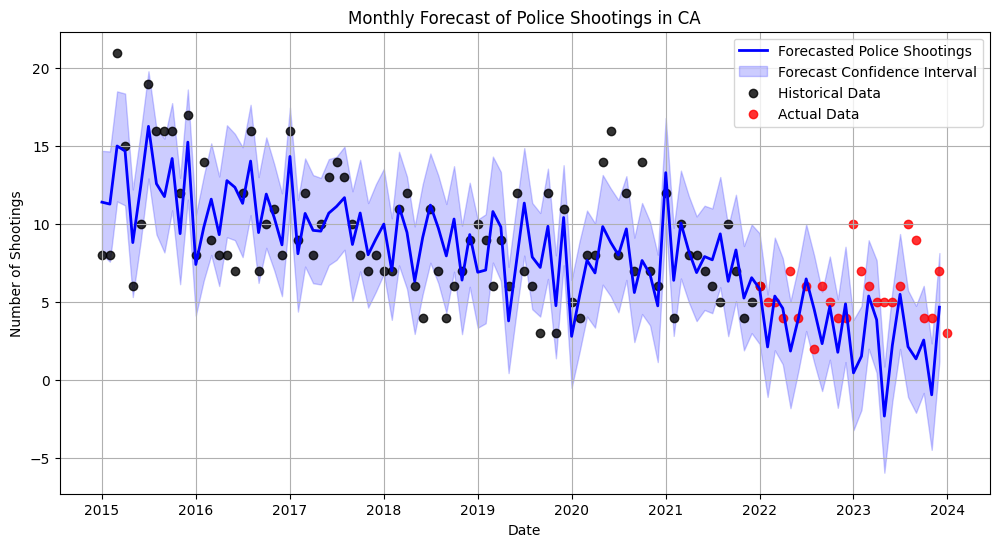

<Figure size 640x480 with 0 Axes>

In [18]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_data = merged_data_corrected.rename(columns={'date': 'ds', 'shooting_count': 'y', 'crime_rates': 'crime_rate'})
prophet_data = prophet_data[['ds', 'y', 'crime_rate']]

# Filter data to include only police shooting data up to January 2022
train_data = prophet_data[prophet_data['ds'] <= '2022-01']

# Initialize the Prophet model
model = Prophet()

# Add crime rates as a regressor
model.add_regressor('crime_rate')

# Fit the model
model.fit(train_data)

# Create a future dataframe to predict police shootings for 2023–2024
future = prophet_data[['ds', 'crime_rate']].copy()  # Use all available dates and crime rates
# future = future[future['ds'] > '2022-01']  # Only forecast for periods beyond January 2022
# remove Nan values
future = future.dropna()

# Forecast
forecast = model.predict(future)

# Combine historical data and forecast
forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]  # Select forecast columns


fut_data = prophet_data[prophet_data['ds'] >= '2022-01']


# Plot historical and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Police Shootings', color='blue', linewidth=2)
plt.fill_between(
    forecast['ds'],
    forecast['yhat_lower'],
    forecast['yhat_upper'],
    color='blue',
    alpha=0.2,
    label='Forecast Confidence Interval'
)
plt.scatter(train_data['ds'], train_data['y'], color='black', label='Historical Data', alpha=0.8)
plt.scatter(fut_data['ds'], fut_data['y'], color='red', label='Actual Data', alpha=0.8)
plt.title('Monthly Forecast of Police Shootings in CA')
plt.xlabel('Date')
plt.ylabel('Number of Shootings')
plt.grid()
plt.legend()
plt.show()

# save the plot
if not os.path.exists('time_series'):
    os.makedirs('time_series')
plt.savefig('time_series/cal_forecast_crime.png')
